In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
#style.use("fivethirtyeight")
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("max_columns", None)

### App criteria

*https://appinventiv.com/blog/how-to-get-your-app-featured-in-play-store/*
- Does not belong to saturated category
- decent ratings and installs
- apps must have at least 1 review and install
- Free apps with in-app ads

Selected by Google Play team 

Featured: Selected new apps 
Staff Picks: Rotating set of staff-selected apps 

**Editors’ Choice: Some of the best Android apps of all-time on Google Play**

Top Developer: Some of the best developers on Google Play

With all said and done, let us now look into the ways on how to get your app noticed on Google Play and then get it featured on the Play Store and maybe even come in the list of Editor’s Choice. These ways are a sure fire way to get an answer to the question― how to get your app featured on google play?

In [2]:
df = pd.read_csv("Google-Playstore.csv")

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Developer Website   32.89466
Privacy Policy      18.19988
Released             3.07197
Rating               0.98935
Rating Count         0.98935
Minimum Android      0.28232
Size                 0.00847
Currency             0.00584
Installs             0.00463
Minimum Installs     0.00463
Developer Id         0.00143
Developer Email      0.00134
App Name             0.00009
App Id               0.00000
Price                0.00000
Free                 0.00000
Maximum Installs     0.00000
Last Updated         0.00000
Content Rating       0.00000
Category             0.00000
Ad Supported         0.00000
In App Purchases     0.00000
Editors Choice       0.00000
Scraped Time         0.00000
dtype: float64

In [5]:
# Numeric columns summarized
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.00000,2290061.00000,2312837.00000,2312944.00000,2312944.00000
mean,2.20315,2864.83888,183445.21396,320201.71314,0.10350
std,2.10622,212162.57104,15131439.05973,23554954.88655,2.63313
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,50.00000,84.00000,0.00000
50%,2.90000,6.00000,500.00000,695.00000,0.00000
75%,4.30000,42.00000,5000.00000,7354.00000,0.00000
max,5.00000,138557570.00000,10000000000.00000,12057627016.00000,400.00000


In [6]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


### Vague columns

In [7]:
df["Privacy Policy"].value_counts()

http://www.subsplash.com/legal/privacy                                            7481
https://unity3d.com/legal/privacy-policy                                          5312
http://www.trainerize.com/privacy.aspx                                            5181
http://www.chownow.com/privacy-policy                                             4783
https://classplusapp.com/privacy.html                                             4373
                                                                                  ... 
https://protsak2017.blogspot.com/2017/11/wallpaper-privacy-policy.html               1
http://aplus-development.com/policy/schoolapp/policy.php?app=4365&lg=en              1
https://www.rewindit.fm/privacy.html                                                 1
https://app.appmobilecity.com/application/privacypolicy/index/id/6008776bb8c57       1
https://biliyor-musun-sons.flycricket.io/privacy.html                                1
Name: Privacy Policy, Length: 977743, dtype

In [8]:
# Looks like android version minimum, probably not too neccessary
df["Minimum Android"].value_counts()

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64

In [9]:
# Developer name/company
df["Developer Id"].value_counts()

Subsplash Inc         5422
TRAINERIZE            5153
ChowNow               4865
OrderYOYO             2884
Phorest               2821
                      ... 
Jack Troshinsky          1
ITIPER                   1
East Point Systems       1
Yılmaz İsmail            1
Eventi                   1
Name: Developer Id, Length: 758371, dtype: int64

In [10]:
df["Editors Choice"].value_counts()

False    2312091
True         853
Name: Editors Choice, dtype: int64

In [11]:
df["Rating Count"].value_counts()

0.00000          1059762
5.00000            64288
6.00000            54325
7.00000            46838
8.00000            40585
                  ...   
9028.00000             1
27999.00000            1
1271735.00000          1
29786.00000            1
78351.00000            1
Name: Rating Count, Length: 38482, dtype: int64

In [12]:
df["Installs"].value_counts()

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

In [13]:
df.sample(15, random_state= 40)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
978208,Salario Mínimo MX,app.agsolutions.abraham.salariomnimomx,Finance,0.00000,0.00000,500+,500.00000,867,True,0.00000,USD,2.7M,4.1 and up,AG Solutions,NaN,agsolutions96@gmail.com,"Jan 19, 2019","Jan 26, 2019",Everyone,NaN,True,False,False,2021-06-16 11:58:01
788953,Dope - Attitude Wallpaper Hd - Motivational Qu...,com.vicky.wallpaperapp,Personalization,4.30000,75.00000,"10,000+",10000.00000,22253,True,0.00000,USD,11M,5.0 and up,Vicky Appss,NaN,hello@vickyapps.xyz,"Mar 24, 2020","Oct 21, 2020",Everyone,http://vickyapps.xyz/privacy-policy-wallpaper-...,True,False,False,2021-06-16 09:01:46
1503773,Music Player : No ads,com.dibandroid.softwareltdnfmusic,Music & Audio,3.40000,38.00000,"5,000+",5000.00000,5363,True,0.00000,USD,2.5M,5.0 and up,dib android software,NaN,dibsoftltd@gmail.com,"Feb 20, 2020","Feb 20, 2020",Teen,https://skydoctorbd.blogspot.com/p/music-playe...,False,False,False,2021-06-16 01:25:38
815844,Pung Kang Noodle House,com.chownow.pungkangnoodlehouse,Food & Drink,0.00000,0.00000,10+,10.00000,26,True,0.00000,USD,17M,5.0 and up,ChowNow,http://www.chownow.com,eng-android@chownow.com,"Jul 14, 2016","Feb 16, 2020",Everyone,http://www.chownow.com/privacy-policy,False,False,False,2021-06-16 09:26:50
210301,"Sorah ""REHMAN""",com.sialapps.sorah.rehman,Social,0.00000,0.00000,100+,100.00000,228,True,0.00000,USD,35M,2.0 and up,sialapps,NaN,sialapps12@gmail.com,"Jun 24, 2017","Jun 24, 2017",Teen,NaN,True,False,False,2021-06-15 23:53:11
228440,Fly and Spiders,info.fandroid.android,Arcade,4.70000,71.00000,"1,000+",1000.00000,2322,True,0.00000,USD,3.4M,2.3 and up,FandroidApps,http://www.fandroid.info,flygame@fandroid.info,"Dec 18, 2015","Jan 04, 2016",Everyone,NaN,True,False,False,2021-06-16 00:15:05
1035656,Asian Boulevard VIP,nl.loyaltygroup.asianboulevard,Food & Drink,0.00000,0.00000,500+,500.00000,724,True,0.00000,USD,18M,4.4 and up,Loyaltygroup BV,https://asianboulevard.nl/,info@asianboulevard.nl,"Nov 13, 2019","Feb 27, 2020",Mature 17+,https://www.loyaltygroup.nl/wp-content/privacy...,False,False,False,2021-06-16 12:52:59
582159,udn 售票網,com.udn.udntickets,Entertainment,1.80000,325.00000,"100,000+",100000.00000,127285,True,0.00000,USD,13M,4.4 and up,United Daily News Group,https://tickets.udnfunlife.com,cs.tickets@udnfunlife.com,"Nov 24, 2015","Oct 16, 2019",Everyone,http://www.udngroup.com/information/privacy,False,False,False,2021-06-16 05:49:09
1970053,ماجد المهندس - محلا اللقى (بدون الإنترنت) 2020,com.eltudo.maji,Music & Audio,0.00000,0.00000,100+,100.00000,277,True,0.00000,USD,21M,4.0.3 and up,tudo,NaN,eltudo2016@gmail.com,"Feb 17, 2020","Feb 17, 2020",Everyone,NaN,True,False,False,2021-06-16 07:59:57
729396,Jazz Radio Free,com.jazzradiogratis.jaazmusicradio,Music & Audio,4.40000,17.00000,"1,000+",1000.00000,1443,True,0.00000,USD,9.8M,4.2 and up,Apps Radio - Full Musica Online,NaN,elcreativotuamor@gmail.com,"Oct 15, 2020","Oct 16, 2020",Teen,https://appsradiofullmusica.blogspot.com/2020/...,True,False,False,2021-06-16 08:05:46


Non-English language apps, need to remove

In [14]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [15]:
df["Currency"].value_counts(dropna = False)

USD    2311548
XXX       1236
NaN        135
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

In [16]:
# Drop irrelevant columns
columns_dropped =   [
                        "App Id",
                        "Developer Website",
                        "Developer Email",
                        "Privacy Policy",
                        "Scraped Time",
                        "Size",
                        "Minimum Android"
                    ]

df = df.drop(columns=columns_dropped)

In [17]:
# Convert app name from object to string
df["App Name"] = df["App Name"].astype("string")

In [18]:
# Drop missing data
df = df.dropna(subset = ["App Name", "Developer Id"])

In [19]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Released           3.07193
Rating             0.98932
Rating Count       0.98932
Currency           0.00584
Installs           0.00463
Minimum Installs   0.00463
App Name           0.00000
In App Purchases   0.00000
Ad Supported       0.00000
Content Rating     0.00000
Last Updated       0.00000
Price              0.00000
Developer Id       0.00000
Category           0.00000
Free               0.00000
Maximum Installs   0.00000
Editors Choice     0.00000
dtype: float64

In [20]:
# Non-English language apps (sample)
df[~df["App Name"].map(lambda x: x.isascii())].sample(15)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
227406,MANI – Mobile Aided Note Identifier,Tools,3.80000,2951.00000,"1,000,000+",1000000.00000,1068638,True,0.00000,USD,RESERVE BANK OF INDIA,"Dec 19, 2019","Dec 02, 2020",Everyone,False,False,False
1346387,재밌는 프룻스토리를 들려주는 왓코와 프로페서알파고,Lifestyle,0.00000,0.00000,10+,10.00000,22,True,0.00000,USD,하이퍼펌프,"Dec 17, 2019","Mar 19, 2020",Everyone,False,False,False
1362675,Rádio Promessa de Fé,Music & Audio,0.00000,0.00000,10+,10.00000,12,True,0.00000,USD,Viva Jovem Apps,"Jul 20, 2020","Jul 21, 2020",Everyone,False,False,False
52263,Tartışma Programı * Canlı tartışma,Entertainment,0.00000,0.00000,100+,100.00000,110,True,0.00000,USD,tseng chih min,"Nov 2, 2019","Nov 02, 2019",Teen,True,False,False
933595,Du lịch bốn phương,Travel & Local,0.00000,0.00000,10+,10.00000,34,True,0.00000,USD,Coeus Technology and Communication JS,"Jun 10, 2017","Jun 10, 2017",Everyone,False,False,False
2269206,Tapitas gestión,Tools,0.00000,0.00000,100+,100.00000,119,True,0.00000,USD,TapitasApp,"Sep 8, 2017","Sep 16, 2017",Everyone,False,False,False
1538882,Ф.И. Хониши Ифоданок,Education,0.00000,0.00000,100+,100.00000,166,True,0.00000,USD,"NGO ""The Centre of ICT""","May 9, 2017","May 11, 2017",Everyone,False,False,False
727279,СилаУма,Business,0.00000,0.00000,50+,50.00000,71,True,0.00000,USD,"Primavera, OOO","Apr 15, 2019","Apr 15, 2019",Everyone,False,False,False
258980,أغنية بياع كلام - نبيل بدون انترنت,Entertainment,4.80000,13.00000,"1,000+",1000.00000,1764,True,0.00000,USD,Guides of Games,"Dec 15, 2020","Dec 15, 2020",Everyone,True,False,False
706153,Anotador De Truco🔋Alto Rendimiento,Entertainment,4.50000,19.00000,"1,000+",1000.00000,1791,True,0.00000,USD,ArgenDev,"Mar 12, 2018","Aug 06, 2018",Everyone,True,False,False


In [21]:
# Filter out non-english language apps
df = df[df["App Name"].map(lambda x: x.isascii())]

In [22]:
# Change developer id data type to "string"
df["Developer Id"] = df["Developer Id"].astype("string")

In [23]:
# Non-english language developers
df[~df["Developer Id"].map(lambda x: x.isascii())].sample(15)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
2298745,Tieng Anh 8 - Tieng Anh lop 8,Education,4.10000,15.00000,"1,000+",1000.00000,1919,True,0.00000,USD,Hà Nội Media,"Jul 1, 2019","Aug 04, 2019",Everyone,True,False,False
2061124,ArduinoCar,Education,0.00000,0.00000,10+,10.00000,13,True,0.00000,USD,Rudolf T Bühler,"May 11, 2020","May 12, 2020",Everyone,False,False,False
874116,Medi-Lexico - OT and PT,Education,3.60000,5.00000,500+,500.00000,527,True,0.00000,USD,Collège Éducacentre,"Jan 5, 2016","Mar 10, 2015",Everyone,False,False,False
1308424,Find Differences to move,Puzzle,3.40000,13.00000,"1,000+",1000.00000,3928,True,0.00000,USD,袖川正幸,"May 9, 2014","Oct 25, 2016",Everyone,True,False,False
1562775,MardinLife.Com Mardin Haber Sitesi,News & Magazines,0.00000,0.00000,500+,500.00000,674,True,0.00000,USD,Mehmet Onur SEKİZKARDEŞ,"May 21, 2019","May 21, 2019",Everyone 10+,True,False,False
46195,Pessoa Wines,Entertainment,0.00000,0.00000,50+,50.00000,85,True,0.00000,USD,Jorge MC Gonçalves,"Feb 19, 2018","Feb 20, 2018",Everyone,False,False,False
1334022,Radyo Mix,Music & Audio,0.00000,0.00000,100+,100.00000,104,True,0.00000,USD,YTD Yazılım,"May 29, 2018","May 29, 2018",Everyone,False,False,False
425336,Voting,Education,0.00000,0.00000,100+,100.00000,110,True,0.00000,USD,Innovo Tecnologías,"Oct 28, 2018","Apr 27, 2020",Everyone,False,False,False
1359514,AnimEXs Sticker for WhatsApp (no ads),Communication,0.00000,0.00000,"50,000+",50000.00000,50824,True,0.00000,USD,BAKA² PROJECT,"Mar 1, 2019","Nov 01, 2020",Mature 17+,False,False,False
852434,SuperCrono MX20170902,Entertainment,0.00000,0.00000,500+,500.00000,829,False,2.49000,USD,TeccomGDL - Corporación,"Sep 21, 2017","Sep 21, 2017",Everyone,False,False,False


In [24]:
# Filter out non-english speaking developers
df = df[df["Developer Id"].map(lambda x: x.isascii())]

In [25]:
df.sample(10)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
528693,Girly Rose Keyboard Background,Personalization,4.70000,228.00000,"10,000+",10000.00000,37162,True,0.00000,USD,Theme Design Apps for Android,"Oct 6, 2020","Oct 08, 2020",Everyone,True,False,False
224432,SuperX File Manager - File Explorer for Android,Tools,4.10000,39.00000,"5,000+",5000.00000,9660,True,0.00000,USD,Madly Apps,"Dec 20, 2018","Dec 20, 2018",Everyone,True,False,False
2126570,MIRAI ENIKKI 2,Lifestyle,0.00000,0.00000,"10,000+",10000.00000,11231,True,0.00000,USD,OKI-T3,"Mar 30, 2020","Apr 08, 2020",Everyone,False,False,False
1165809,Galaxy Hunter: Space Shooter Attack,Arcade,4.20000,5.00000,"1,000+",1000.00000,2351,True,0.00000,USD,Danred Media Apps,"Mar 1, 2020","Apr 29, 2020",Everyone,True,True,False
1923545,Hello English Talk,Education,3.00000,532.00000,"100,000+",100000.00000,250679,True,0.00000,USD,Hello Study,"Apr 26, 2017","Jul 22, 2018",Everyone,True,False,False
1370177,Word Game,Word,4.20000,61.00000,"10,000+",10000.00000,16567,True,0.00000,USD,proGames,"Jul 26, 2017","Sep 08, 2019",Everyone,True,True,False
1843670,Balochi Shayari,Entertainment,3.60000,36.00000,"5,000+",5000.00000,7187,True,0.00000,USD,RangliApps,"Sep 27, 2019","Sep 28, 2019",Everyone,True,False,False
90096,Honeywell Instant Alert Plus,Business,0.00000,0.00000,500+,500.00000,633,True,0.00000,USD,"Nuance Communications, Inc.","Feb 27, 2014","Sep 19, 2017",Everyone,False,False,False
1987908,Attitude Status,Social,0.00000,0.00000,100+,100.00000,159,True,0.00000,USD,AppTastic Inc.,"Aug 29, 2020","Aug 29, 2020",Teen,True,False,False
615144,Fervent Church,Lifestyle,4.80000,5.00000,100+,100.00000,337,True,0.00000,USD,Subsplash Inc,"Jan 14, 2016","Mar 05, 2019",Everyone,False,False,False


In [26]:
# Duplicate rows
df[df.duplicated("App Name")]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
2377,Bhagavad Gita in English,Books & Reference,0.00000,0.00000,50+,50.00000,51,True,0.00000,XXX,Cipher SoftTech,"Dec 25, 2020","Dec 25, 2020",Everyone,True,False,False
2562,Mancala,Board,4.30000,886.00000,"100,000+",100000.00000,147049,True,0.00000,USD,Mancala & Oware Games,"Nov 22, 2019","Jul 24, 2020",Everyone,True,False,False
3339,Gallery,Tools,4.50000,708.00000,"100,000+",100000.00000,173245,True,0.00000,USD,Photo gallery and Simple gallery lite,"Jan 2, 2021","Jun 07, 2021",Everyone,True,False,False
4642,Age Calculator,Productivity,4.50000,53.00000,"10,000+",10000.00000,11228,True,0.00000,USD,NSTechFrame,"Jan 2, 2015","Feb 12, 2015",Everyone,False,False,False
4771,Vacuum Cleaner Sound,Music & Audio,0.00000,0.00000,10+,10.00000,26,False,2.49000,USD,Animated Oak Entertainment Ltd,"Jan 11, 2016","Jan 11, 2016",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312930,PAX,Travel & Local,3.30000,7.00000,100+,100.00000,388,True,0.00000,USD,Apreciasoft Software,"Sep 2, 2019","Nov 26, 2020",Everyone,False,False,False
2312934,Vietnamese - English Translator,Education,0.00000,0.00000,5+,5.00000,6,True,0.00000,USD,Eliminates Apps,"Jun 15, 2020","Aug 31, 2020",Everyone,True,False,False
2312935,Floral Wallpaper,Personalization,0.00000,0.00000,"1,000+",1000.00000,1302,True,0.00000,USD,arfdev,"Jul 19, 2018","Nov 13, 2019",Everyone,True,False,False
2312941,Data Structure,Education,0.00000,0.00000,100+,100.00000,202,True,0.00000,USD,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False


In [27]:
# Drop duplicates
df = df.drop_duplicates("App Name")
df.reset_index(drop=True)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False
1,Vibook,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
2,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
3,GROW.me,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
4,IMOCCI,Social,0.00000,0.00000,50+,50.00000,89,True,0.00000,USD,Imocci GmbH,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824907,Caustic Editor for VolcaSample,Music & Audio,4.00000,344.00000,"500,000+",500000.00000,814548,True,0.00000,USD,Single Cell Software,"Dec 11, 2014","Dec 11, 2014",Everyone,False,False,False
1824908,Engineers Careers,Business,0.00000,0.00000,100+,100.00000,353,True,0.00000,USD,Eventi,"Mar 5, 2020","Feb 29, 2020",Everyone,False,False,False
1824909,STMIK Mercusuar - Aditya Rachman,Education,0.00000,0.00000,5+,5.00000,7,True,0.00000,USD,STMIK Mercusuar,"Jan 15, 2020","Jan 15, 2020",Everyone,False,False,False
1824910,Lero TOEFL Recorder + Timer,Education,3.40000,17.00000,"1,000+",1000.00000,1980,True,0.00000,USD,Julio Augusto Vera,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False


In [28]:
df["Rating Count"].describe()

count     1805219.00000
mean         2983.19976
std        228419.32377
min             0.00000
25%             0.00000
50%             5.00000
75%            38.00000
max     138557570.00000
Name: Rating Count, dtype: float64

In [29]:
df[df["Rating Count"] > 39]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70000,820.00000,"50,000+",50000.00000,62433,True,0.00000,USD,Free 2021 Themes for Emoji keyboard,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False
10,Dodge The Cars!,Racing,4.90000,55.00000,100+,100.00000,329,True,0.00000,USD,MrScratch,"Jul 30, 2020","Jul 30, 2020",Everyone,False,False,False
14,Caliway Conductor,Travel & Local,3.70000,1572.00000,"10,000+",10000.00000,42856,True,0.00000,USD,WayCali,"Sep 5, 2018","May 30, 2020",Everyone,False,False,False
18,REDMOND Robot,Lifestyle,3.70000,328.00000,"10,000+",10000.00000,31235,True,0.00000,USD,Grit Technology,"Jul 1, 2020","May 26, 2021",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312913,Moneygment,Finance,2.00000,1687.00000,"100,000+",100000.00000,187822,True,0.00000,USD,Togetech Inc.,"Oct 21, 2017","Jun 07, 2021",Everyone,False,False,False
2312918,La Sicilia Edicola Digitale,Entertainment,2.70000,81.00000,"10,000+",10000.00000,20415,True,0.00000,USD,Domenico Sanfilippo Editore S.p.A.,"Apr 16, 2015","Apr 06, 2020",Everyone,True,False,False
2312931,Driving Day,Entertainment,2.80000,1002.00000,"500,000+",500000.00000,590469,True,0.00000,USD,maan1patel0,"Jun 10, 2020","Jun 10, 2020",Everyone,True,False,False
2312932,Hopeless 2: Cave Escape,Action,4.30000,103466.00000,"5,000,000+",5000000.00000,7274660,True,0.00000,USD,Upopa Games,"Oct 29, 2015","Mar 06, 2017",Teen,True,True,False


In [30]:
# Converts both columns to datetime
# Only neccessary to run once
df[["Released","Last Updated"]] = df[["Released","Last Updated"]].apply(pd.to_datetime)
 

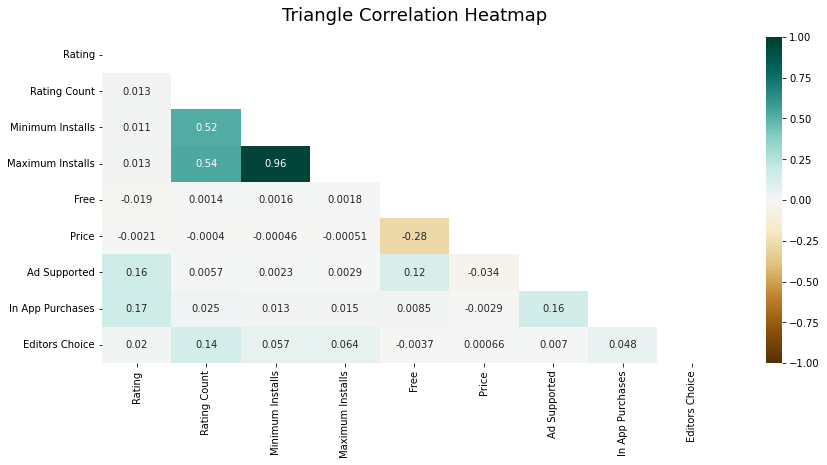

In [31]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

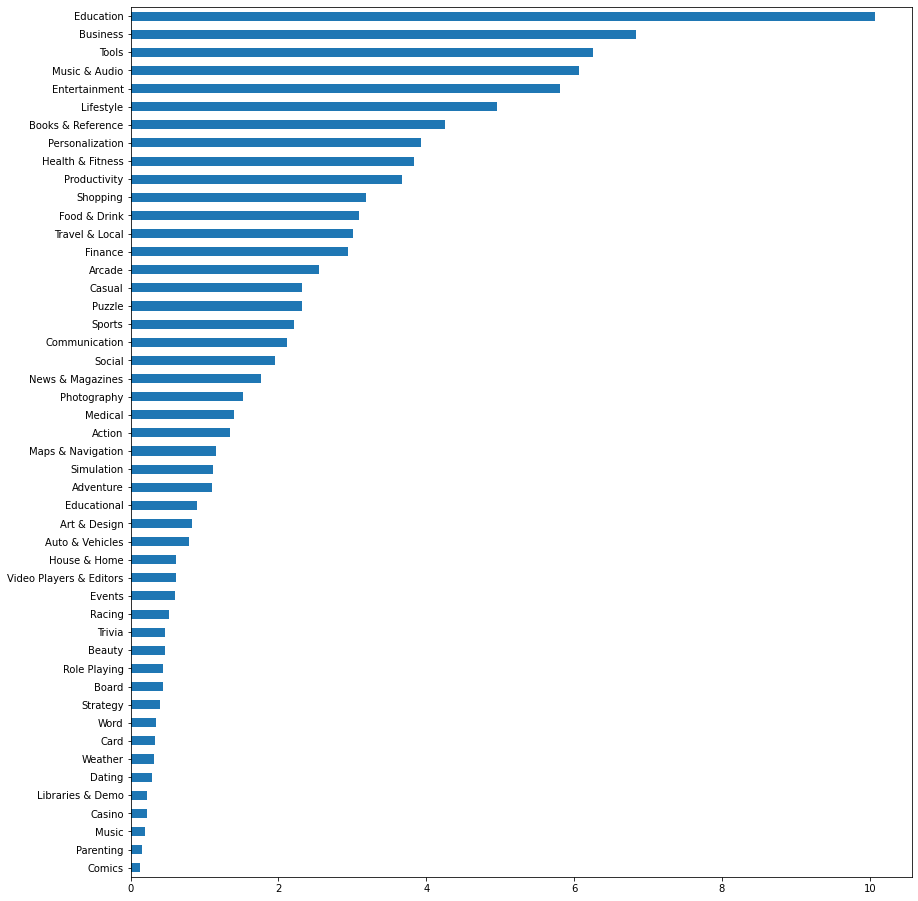

In [32]:
# App category frequency
(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

<AxesSubplot:xlabel='Rating'>

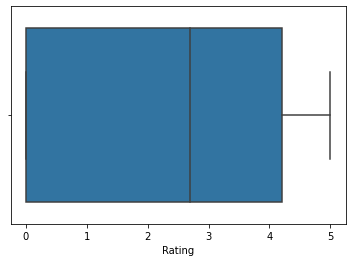

In [33]:
# Rating distribution
sns.boxplot(x = df["Rating"])

In [34]:
df["Rating"].describe()

count   1805219.00000
mean          2.14563
std           2.10395
min           0.00000
25%           0.00000
50%           2.70000
75%           4.20000
max           5.00000
Name: Rating, dtype: float64

In [35]:
df["Rating Count"].describe()

count     1805219.00000
mean         2983.19976
std        228419.32377
min             0.00000
25%             0.00000
50%             5.00000
75%            38.00000
max     138557570.00000
Name: Rating Count, dtype: float64

<AxesSubplot:xlabel='Rating Count'>

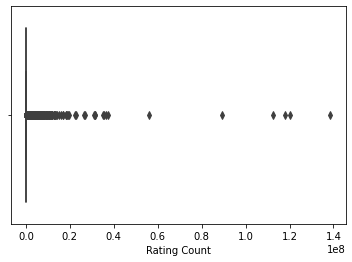

In [36]:
# Rating count distribution
sns.boxplot(x = df["Rating Count"])

In [37]:
# App categories with 0 reviews, counted
df[df["Rating Count"] == 0]["Category"].value_counts().sort_values(ascending = False)

Education                  88095
Business                   81138
Music & Audio              55020
Lifestyle                  50717
Tools                      44874
Health & Fitness           42747
Entertainment              42027
Food & Drink               40160
Books & Reference          36187
Productivity               34524
Shopping                   33239
Travel & Local             29104
Personalization            24678
Finance                    21997
Arcade                     19202
Communication              18394
Sports                     17398
Casual                     16726
Social                     15455
Puzzle                     14858
Medical                    14159
News & Magazines           13368
Photography                 9835
Maps & Navigation           9524
Events                      7705
Art & Design                7702
Action                      7562
House & Home                7068
Auto & Vehicles             6953
Educational                 6621
Adventure 

In [38]:
# Maximum number of installs summarized: average, median, mode
df["Maximum Installs"].describe()

count       1824912.00000
mean         340657.91799
std        25965137.16527
min               0.00000
25%              74.00000
50%             587.00000
75%            6224.00000
max     12057627016.00000
Name: Maximum Installs, dtype: float64

In [39]:
# Applications with more than zero installs and reviews
df = df[(df["Maximum Installs"] > 0) & (df["Rating Count"] > 0)]

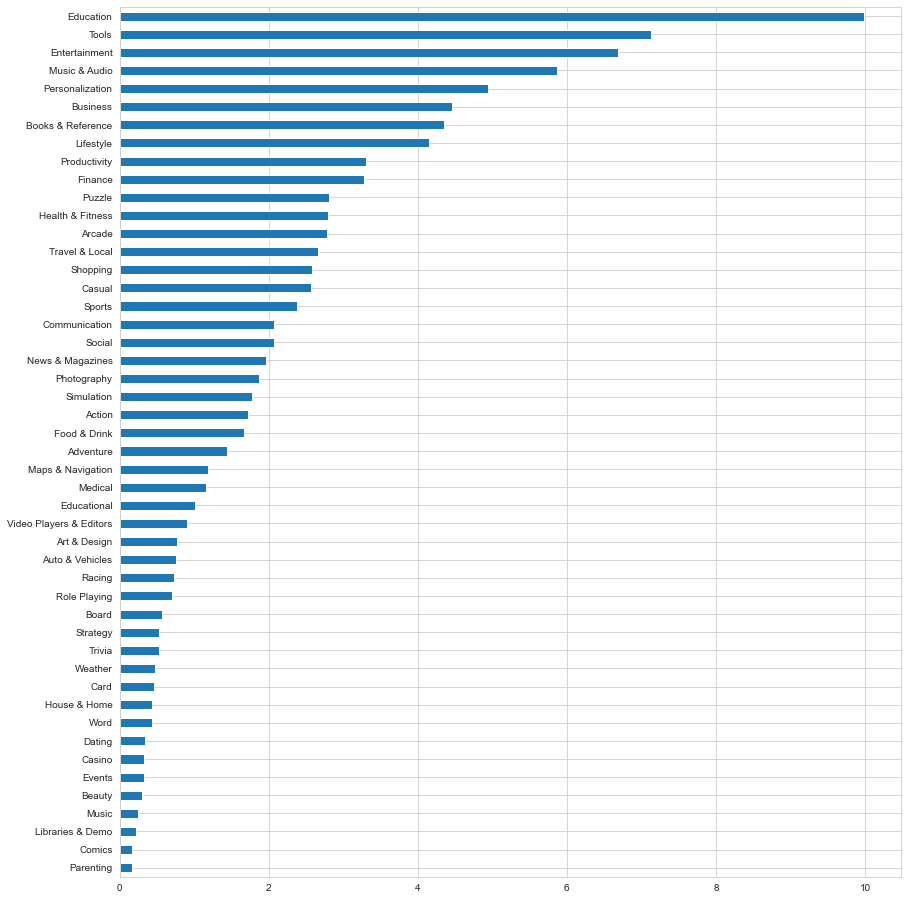

In [40]:
# Category frequency
sns.set_style("whitegrid")
(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

<AxesSubplot:ylabel='Category'>

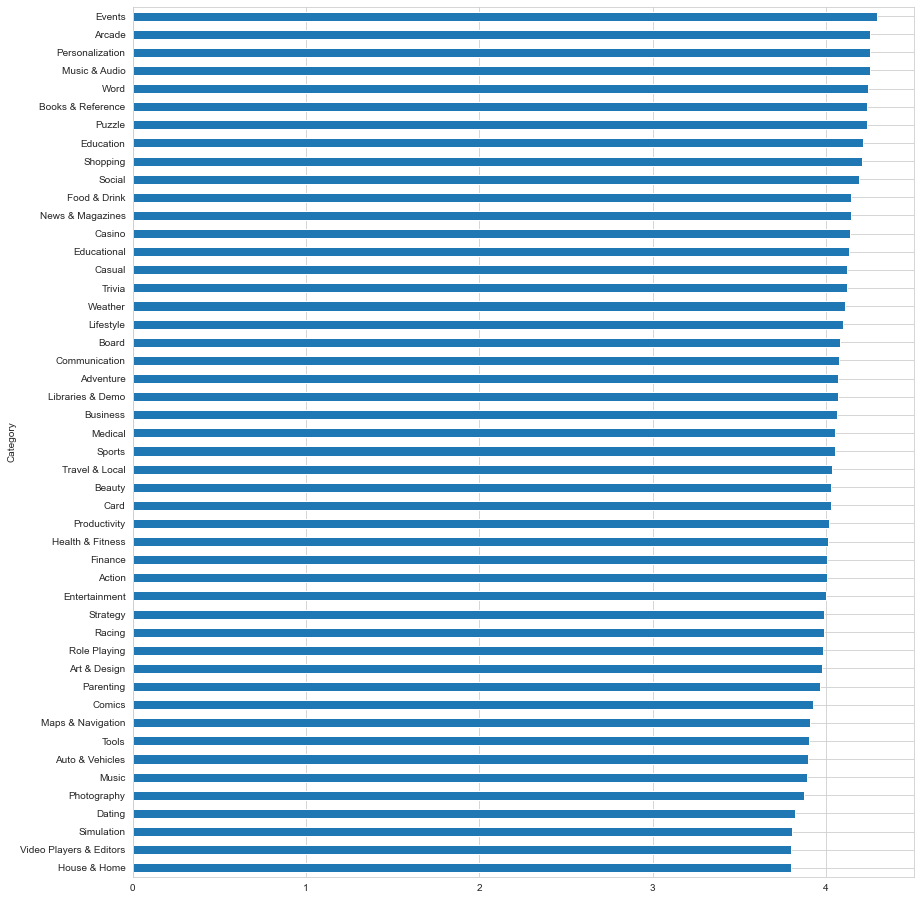

In [41]:
# Category rating average
categories_grouped = df.groupby("Category")
categories_grouped["Rating"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))

In [42]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Developer Id', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

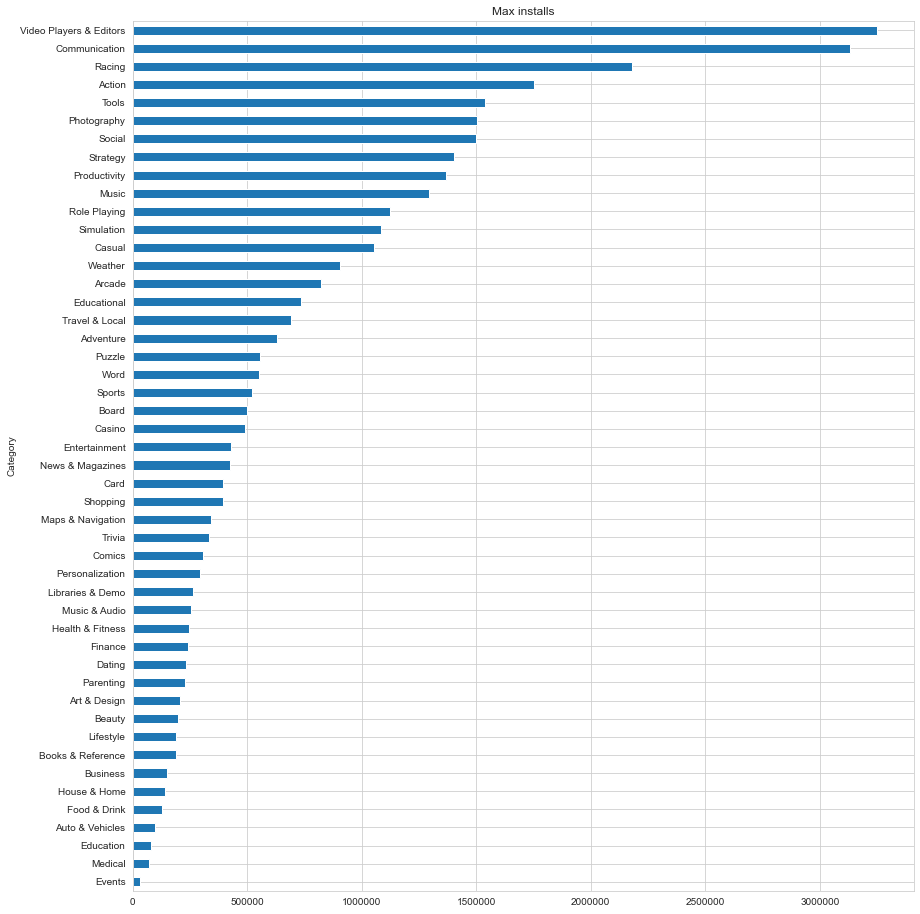

In [43]:
# Categories with maximum installs, average
categories_grouped["Maximum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Max installs")
plt.show()

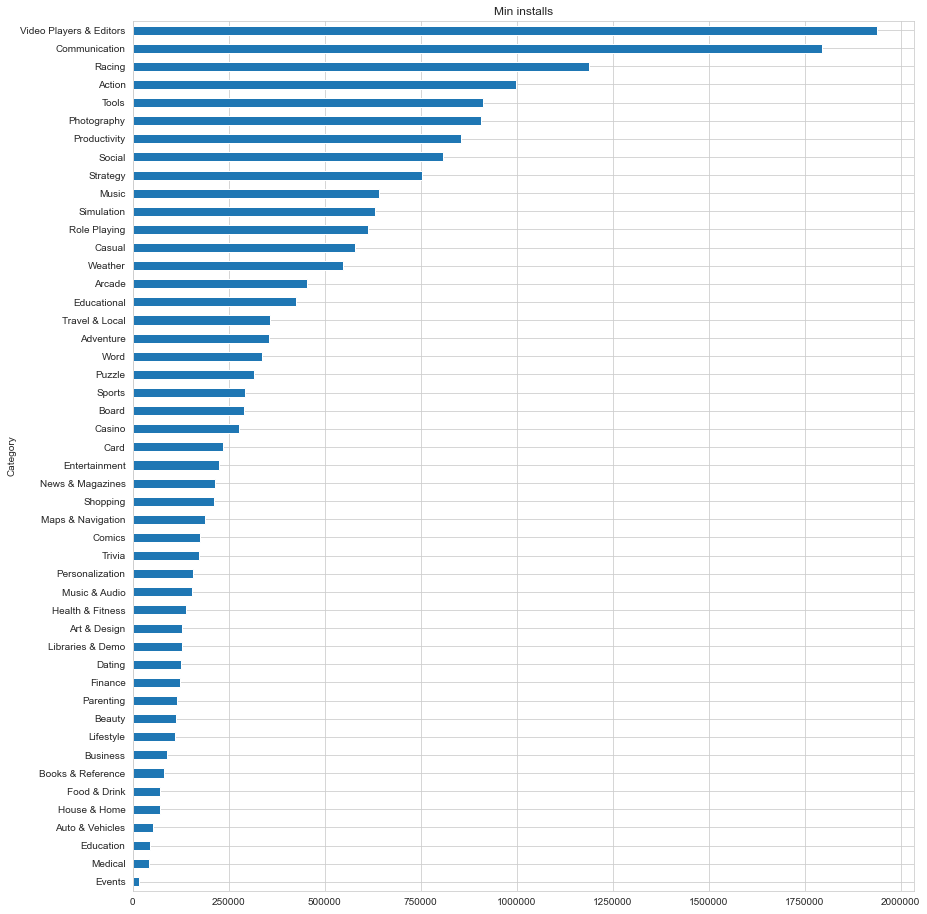

In [44]:
# Categories with highest minimum installs, average
categories_grouped["Minimum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Min installs")
plt.show()

<AxesSubplot:>

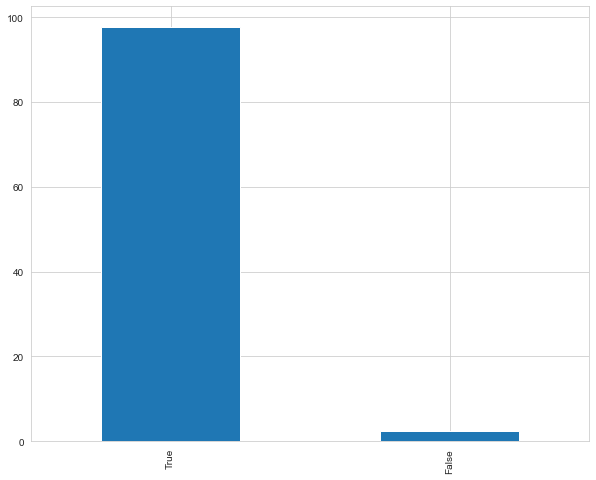

In [45]:
# Free vs. Paid apps

# Free apps: True
# Paid apps: False
(df["Free"].value_counts(normalize = True) * 100).plot.bar(figsize = (10,8))

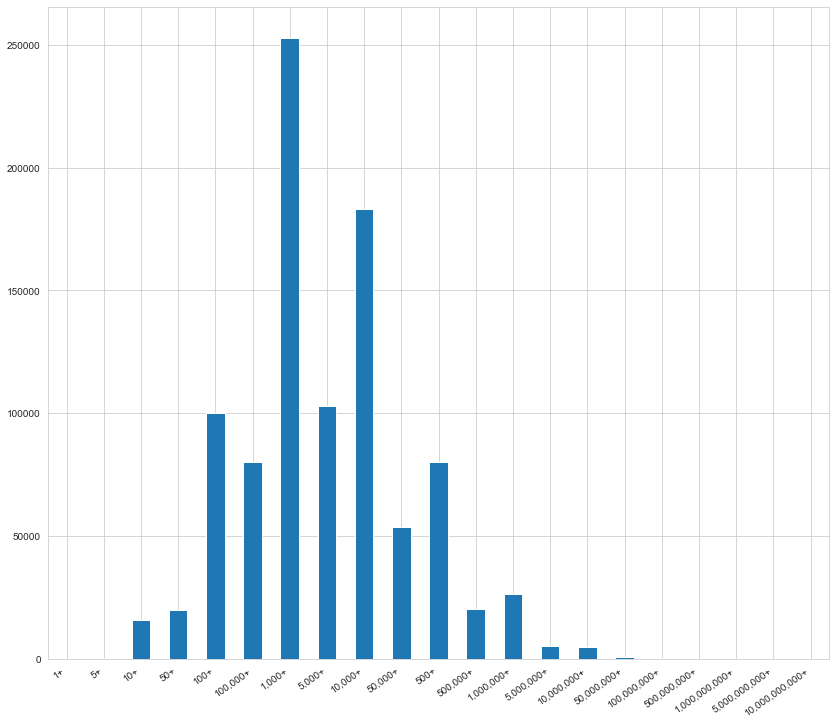

In [46]:
series = df["Installs"].value_counts().iloc[[16, 15, 10, 9, 3, 5, 0, 2, 1, 6, 4, 8, 7, 11, 12, 13, 14, 17, 18, 19, 20]]
series.plot.bar(figsize = (14, 12))
plt.xticks(rotation = 35, ha = "right")
plt.show()

In [47]:
game_categories = [
                        'Puzzle', 
                        'Arcade', 
                        'Simulation', 
                        'Action', 
                        'Adventure', 
                        'Racing', 
                        'Role Playing', 
                        'Board', 
                        'Strategy', 
                        'Casino', 
                        'Card', 
                        'Word', 
                        'Trivia',
                        'Casual',
                 ]
                   
# Define function for separating the various game categories from non game categories
# If any of the below is true, it will return true, otherwise any all other categories will be be considered not a game category
def game(row):
    if row == "Puzzle":
        return True
    if row == "Arcade":
        return True
    if row == "Simulation":
        return True
    if row == "Action":
        return True
    if row == "Adventure":
        return True
    if row == "Racing":
        return True
    if row == "Role Playing":
        return True
    if row == "Board":
        return True
    if row == "Strategy":
        return True
    if row == "Casino":
        return True
    if row == "Card":
        return True
    if row == "Word":
        return True
    if row == "Trivia":
        return True
    if row == "Casual":
        return True
    else:
        return False

In [48]:
# APply function
df["Game"] = df["Category"].apply(game)


In [49]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
1,Ampere Battery Info,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,Webserveis,2020-05-21,2021-05-06,Everyone,True,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,Climate Smart Tech2,2018-09-10,2018-10-13,Everyone,True,False,False,False
6,unlimited 4G data prank free app,Libraries & Demo,4.50000,12.00000,"1,000+",1000.00000,2567,True,0.00000,USD,android developer779,2019-09-23,2019-09-27,Everyone,True,False,False,False
7,The Everyday Calendar,Lifestyle,2.00000,39.00000,500+,500.00000,702,True,0.00000,USD,Mozaix LLC,2019-06-21,2019-06-21,Everyone,False,False,False,False
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70000,820.00000,"50,000+",50000.00000,62433,True,0.00000,USD,Free 2021 Themes for Emoji keyboard,2019-09-22,2020-10-07,Everyone,True,False,False,False


In [50]:
df["Ad Supported"].value_counts(normalize = True) * 100

True    56.01910
False   43.98090
Name: Ad Supported, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Category'>

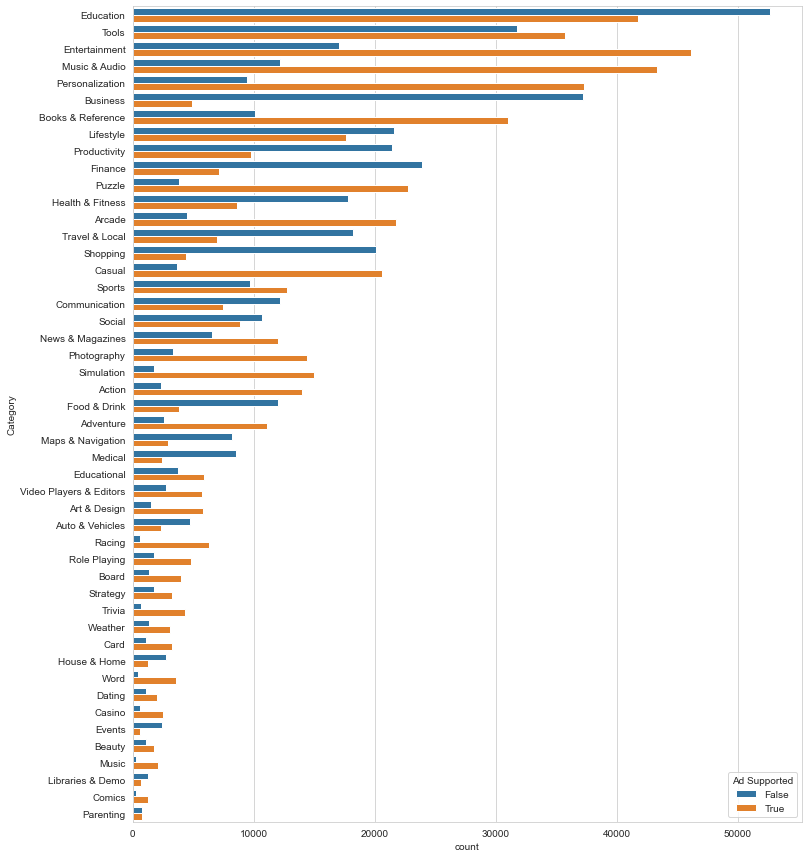

In [51]:
fig, ax = plt.subplots(figsize = (12, 15))
sns.countplot(y = "Category", hue = "Ad Supported", data = df, order = df["Category"].value_counts().index)
#plt.xticks(rotation = 25, ha = "right")

In [52]:
df.groupby("Editors Choice")["Rating"].mean()

Editors Choice
False   4.09038
True    4.33665
Name: Rating, dtype: float64

In [53]:
df.groupby("Editors Choice")["Maximum Installs"].mean()

Editors Choice
False     594073.61438
True    86140876.98071
Name: Maximum Installs, dtype: float64

In [54]:
editors_choice = df[df["Editors Choice"] == True].copy()
editors_choice.shape[0]

674

<AxesSubplot:>

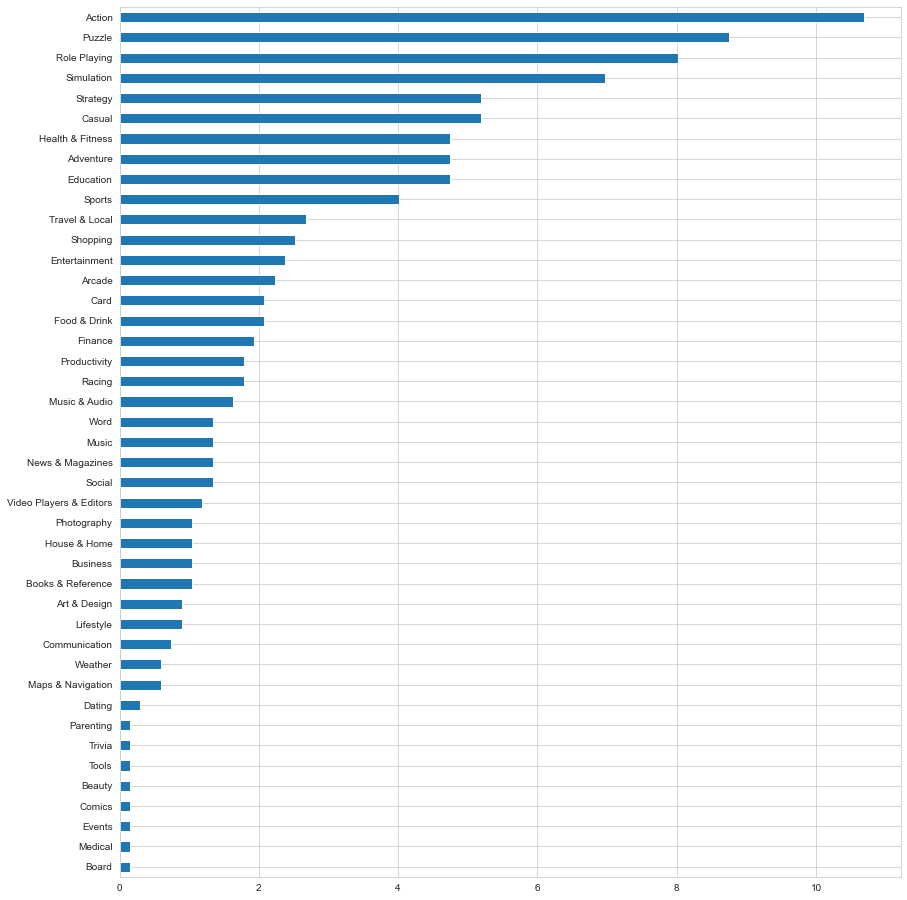

In [55]:
(editors_choice["Category"].value_counts(normalize = True) * 100).sort_values(ascending = True).plot.barh(figsize = (14, 16))

In [56]:
df[df["Category"] == "Sports"].sample(10)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
1750961,Elk Calls,Sports,3.90000,10.00000,"5,000+",5000.00000,5159,True,0.00000,USD,Nielsen Family Creations,2015-12-28,2015-12-29,Everyone,True,False,False,False
1158971,Calisthenics Workout,Sports,4.20000,115.00000,"10,000+",10000.00000,42257,True,0.00000,USD,Christopher Schutzeichel,2017-08-13,2017-11-05,Everyone,False,True,False,False
1587603,Mobile Soccer League Match 2020,Sports,3.30000,1906.00000,"100,000+",100000.00000,327484,True,0.00000,USD,Khanapps,NaT,2020-03-20,Everyone,True,False,False,False
1761274,football odds analysis,Sports,3.10000,774.00000,"10,000+",10000.00000,16379,False,5.00000,USD,oran analiz,2017-11-30,2020-06-16,Mature 17+,True,True,False,False
1324512,Control de figuritas Mundial Qatar 2022,Sports,3.40000,35.00000,"10,000+",10000.00000,11913,True,0.00000,USD,Edenserr - Edensoft,2018-04-04,2018-05-04,Everyone,True,False,False,False
1857500,Beautytime,Sports,3.70000,37.00000,"10,000+",10000.00000,10804,True,0.00000,USD,BR-Solutions,2017-01-16,2019-01-28,Everyone,False,False,False,False
1290732,Cricket Fun Facts,Sports,4.10000,53.00000,"5,000+",5000.00000,5952,True,0.00000,USD,Rachit Technology,2013-02-27,2021-01-21,Everyone,True,True,False,False
98839,"TransforV - Abdominal Exercises, Workout at Home",Sports,5.00000,12.00000,500+,500.00000,567,True,0.00000,USD,Burak Kaya,2021-02-08,2021-05-08,Everyone,True,True,False,False
663536,Sports Bats and Rackets,Sports,4.40000,9.00000,"1,000+",1000.00000,1669,True,0.00000,USD,RamkumarApps,2016-08-01,2020-09-21,Everyone,True,False,False,False
479240,SDBplay,Sports,2.60000,33.00000,"1,000+",1000.00000,1918,True,0.00000,USD,Smart Dartboard,2018-07-12,2021-04-07,Everyone,False,False,False,False


In [57]:
df.shape

(946795, 18)

### Remaining missing data

In [59]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Released           1.91784
Currency           0.00127
Category           0.00000
Editors Choice     0.00000
In App Purchases   0.00000
Ad Supported       0.00000
Content Rating     0.00000
Last Updated       0.00000
Developer Id       0.00000
App Name           0.00000
Price              0.00000
Free               0.00000
Maximum Installs   0.00000
Minimum Installs   0.00000
Installs           0.00000
Rating Count       0.00000
Rating             0.00000
Game               0.00000
dtype: float64

In [61]:
df[df["Released"].isnull()]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
266,O Melhor da :-: Banda Calypso,Music & Audio,4.00000,28.00000,"10,000+",10000.00000,10222,True,0.00000,USD,isal2nd,NaT,2017-09-05,Everyone,True,False,False,False
325,Total stages infimiers,Medical,3.90000,7.00000,"1,000+",1000.00000,3236,True,0.00000,USD,Setes Editions,NaT,2018-10-08,Everyone,False,False,False,False
615,Mein Lotto,Finance,3.90000,20.00000,"1,000+",1000.00000,2236,True,0.00000,USD,facentis GmbH,NaT,2019-10-20,Everyone,False,False,False,False
905,CSHG Digital Private Banking,Finance,4.50000,8.00000,500+,500.00000,946,True,0.00000,USD,Credit Suisse Group AG,NaT,2019-06-26,Everyone,False,False,False,False
967,PEC Vouch365,Lifestyle,2.50000,102.00000,"5,000+",5000.00000,7489,True,0.00000,USD,Entertainer Asia Pvt Ltd,NaT,2019-10-30,Everyone,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312438,Miamz'y,Food & Drink,5.00000,18.00000,"1,000+",1000.00000,1170,True,0.00000,USD,Miamz'y,NaT,2018-01-04,Everyone,False,False,False,False
2312623,kanzlei.land,Productivity,3.70000,7.00000,"1,000+",1000.00000,2915,True,0.00000,USD,TrustStone Software GmbH,NaT,2021-04-14,Everyone,False,False,False,False
2312644,Extracadabra - Etablissement,Business,4.40000,27.00000,"5,000+",5000.00000,6536,True,0.00000,USD,Extracadabra,NaT,2020-11-19,Everyone,False,False,False,False
2312735,Auto-Amigo,Maps & Navigation,4.90000,198.00000,"5,000+",5000.00000,7194,True,0.00000,USD,TaxiCaller Nordic AB,NaT,2021-04-09,Everyone,False,False,False,False


In [62]:
# App release date most common value
df["Released"].mode()

0   2020-06-01
dtype: datetime64[ns]

In [64]:
df["Currency"].mode()

0    USD
dtype: object

In [65]:
df["Released"] = df["Released"].fillna(df["Released"].mode())

In [67]:
df["Currency"] = df["Currency"].fillna(df["Currency"].mode())

In [68]:
df.to_csv("google_apps_cleaned.csv", index = False)
# No need to run multiple times